In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "cleaned_earthquake_data.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)




In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8012 non-null   object 
 1   latitude         8012 non-null   float64
 2   longitude        8012 non-null   float64
 3   depth            8012 non-null   float64
 4   mag              8012 non-null   float64
 5   magType          8012 non-null   object 
 6   nst              8012 non-null   float64
 7   gap              8012 non-null   float64
 8   dmin             8012 non-null   float64
 9   rms              8012 non-null   float64
 10  net              8012 non-null   object 
 11  id               8012 non-null   object 
 12  updated          8012 non-null   object 
 13  place            8012 non-null   object 
 14  type             8012 non-null   object 
 15  horizontalError  8012 non-null   float64
 16  depthError       8012 non-null   float64
 17  magError      

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-02-13 02:11:39.139000+00:00,61.4143,-151.226300,60.80,1.90,ml,17.0,91.00,0.052360,0.4500,...,2025-02-13T02:13:34.057Z,"31 km NNW of Beluga, Alaska",earthquake,0.42,1.00,0.16,12.0,automatic,ak,ak
1,2025-02-13 02:04:00.854000+00:00,37.3001,-117.676300,0.00,0.90,ml,11.0,126.01,0.071000,0.4160,...,2025-02-13T02:06:28.767Z,"50 km S of Silver Peak, Nevada",earthquake,0.42,4.70,0.14,7.0,automatic,nn,nn
2,2025-02-13 01:51:29.710000+00:00,38.8190,-122.841835,1.95,1.12,md,10.0,130.00,0.006719,0.0100,...,2025-02-13T01:53:07.869Z,"9 km NW of The Geysers, CA",earthquake,0.38,0.67,0.37,13.0,automatic,nc,nc
3,2025-02-13 01:38:10.812000+00:00,68.7926,-145.663800,0.00,2.60,ml,17.0,91.00,0.052360,0.8600,...,2025-02-13T01:47:01.040Z,"74 km N of Arctic Village, Alaska",earthquake,0.42,0.40,0.16,12.0,automatic,ak,ak
4,2025-02-13 01:32:59.712000+00:00,37.3111,-117.656900,3.30,2.10,ml,27.0,109.27,0.079000,0.4503,...,2025-02-13T01:35:22.102Z,"49 km S of Silver Peak, Nevada",earthquake,0.42,1.00,0.19,19.0,automatic,nn,nn


In [4]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000
mean,38.729238,-104.727839,22.207049,1.730487,25.101847,100.213345,0.458662,0.297307,1.482052,1.666425,0.172337,19.257239
std,18.273903,69.124791,54.907004,1.267629,21.602759,53.995463,1.775036,0.314609,2.916313,4.684825,0.090119,26.437852
min,-73.220400,-179.937500,0.000000,0.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,33.807375,-135.770292,3.170000,0.870000,14.000000,68.000000,0.017428,0.080000,0.290000,0.430000,0.120000,10.000000
50%,38.795334,-121.753667,7.970000,1.400000,17.000000,91.000000,0.052360,0.170000,0.420000,0.710000,0.160000,12.000000
75%,47.603250,-112.486167,14.420000,2.070000,29.000000,113.000000,0.103000,0.470000,0.670000,1.500000,0.200000,21.000000
max,82.479300,179.971600,690.121000,7.600000,234.000000,348.000000,29.638000,4.950000,31.390000,310.100000,1.980000,703.000000


Accuracy: 0.9868995633187773
Precision: 0.9329896907216495
Recall: 0.9576719576719577
F1 Score: 0.9451697127937336
ROC AUC Score: 0.989358119485418
Confusion Matrix:
[[1401   13]
 [   8  181]]


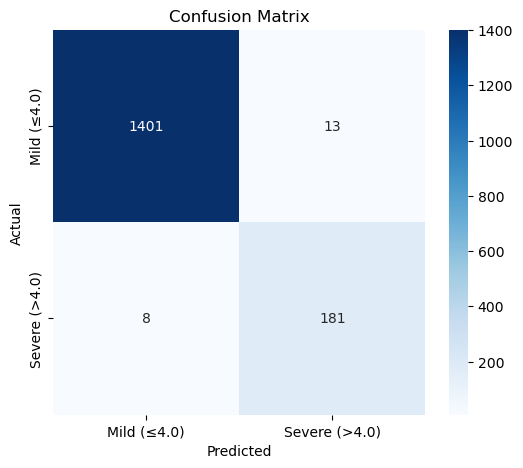

EDA and classification model training completed. Check 'earthquake_heatmap.html' for the map visualization.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
import seaborn as sns

# Load dataset
df = pd.read_csv("cleaned_earthquake_data.csv")

# Convert 'time' to datetime format
df['time'] = pd.to_datetime(df['time'],  format='mixed')

# Convert magnitude into binary classification (Mild ≤4.0, Severe >4.0)
df['severity'] = np.where(df['mag'] > 4.0, 1, 0)

# Feature selection
features = ['latitude', 'longitude', 'depth', 'gap', 'dmin', 'rms']
target = 'severity'
X = df[features]
y = df[target]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

# # Plot ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Mild (≤4.0)', 'Severe (>4.0)'], yticklabels=['Mild (≤4.0)', 'Severe (>4.0)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Geospatial heatmap of earthquakes
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=3)
heat_data = list(zip(df['latitude'], df['longitude'], df['mag']))
HeatMap(heat_data).add_to(m)
m.save("earthquake_heatmap.html")

print("EDA and classification model training completed. Check 'earthquake_heatmap.html' for the map visualization.")


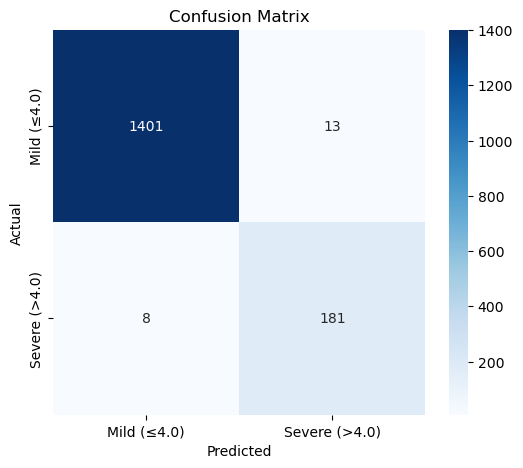

In [7]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Mild (≤4.0)', 'Severe (>4.0)'], yticklabels=['Mild (≤4.0)', 'Severe (>4.0)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("cleaned_earthquake_data.csv")

# Convert 'time' to datetime format
df['time'] = pd.to_datetime(df['time'], format='mixed')

# Convert magnitude into binary classification (Mild ≤4.0, Severe >4.0)
df['severity'] = np.where(df['mag'] > 4.0, 1, 0)

# Feature selection
features = ['latitude', 'longitude', 'depth', 'gap', 'rms']
target = 'severity'
X = df[features]
y = df[target]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)



# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean()}")

# Train vs Test Accuracy
train_acc = accuracy_score(y_train_resampled, model.predict(X_train_resampled))
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

# # Plot ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, linestyle='-', linewidth=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.fill_between(fpr, tpr, alpha=0.3, color='blue')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()



Accuracy: 0.9868995633187773
Precision: 0.9329896907216495
Recall: 0.9576719576719577
F1 Score: 0.9451697127937336
ROC AUC Score: 0.9930756681110287
Confusion Matrix:
[[1401   13]
 [   8  181]]
Cross-validation Accuracy: 0.9868946567881851
Train Accuracy: 1.0, Test Accuracy: 0.9868995633187773


In [28]:
# Geospatial heatmap of earthquakes
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=3)
heat_data = list(zip(df['latitude'], df['longitude'], df['mag']))
HeatMap(heat_data).add_to(m)
m.save("earthquake_heatmap.html")

print("Model comparison completed. Check 'earthquake_heatmap.html' for the map visualization.")

Model comparison completed. Check 'earthquake_heatmap.html' for the map visualization.


Training Random Forest...
Random Forest - Accuracy: 0.9326, Precision: 0.4339, Recall: 0.9880, F1 Score: 0.6029, ROC AUC: 0.9820
Training XGBoost...
XGBoost - Accuracy: 0.9370, Precision: 0.4500, Recall: 0.9759, F1 Score: 0.6160, ROC AUC: 0.9840
Training Logistic Regression...
Logistic Regression - Accuracy: 0.9258, Precision: 0.4109, Recall: 1.0000, F1 Score: 0.5825, ROC AUC: 0.9776
Training SVM...
SVM - Accuracy: 0.9245, Precision: 0.4040, Recall: 0.9639, F1 Score: 0.5694, ROC AUC: 0.9750
Training KNN...
KNN - Accuracy: 0.9233, Precision: 0.4020, Recall: 0.9880, F1 Score: 0.5714, ROC AUC: 0.9681


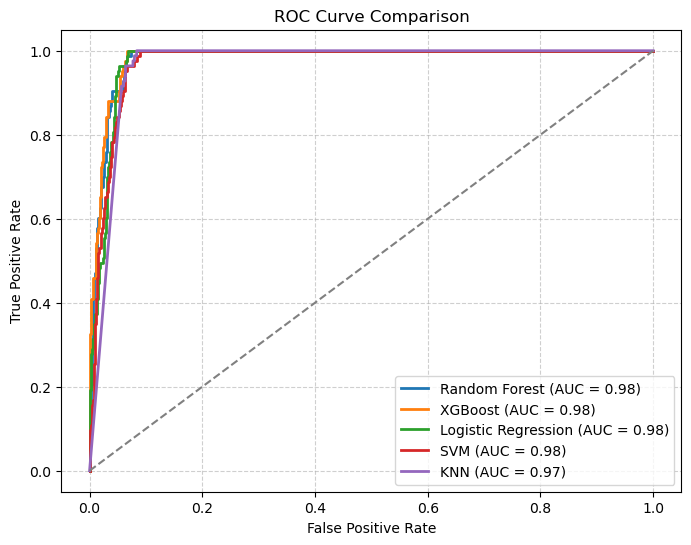

Model comparison completed.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
from imblearn.combine import SMOTEENN  # Combine Oversampling (SMOTE) & Undersampling (Edited Nearest Neighbors)

# Load dataset
df = pd.read_csv("cleaned_earthquake_data.csv")

# Convert 'time' to datetime format
df['time'] = pd.to_datetime(df['time'], format='mixed')

# Define earthquake severity (M > 4.5)
df['severity'] = np.where(df['mag'] > 4.5, 1, 0)

# Feature selection - Adding more features
features = ['latitude', 'longitude', 'depth', 'gap', 'rms', 'dmin', 'horizontalError']
X = df[features]
y = df['severity']

# Reduce noise magnitude to prevent over-distortion
np.random.seed(42)
X += np.random.normal(0, 0.01, X.shape)  # Less noise

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to balance dataset (combination of SMOTE & undersampling)
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Define models with better hyperparameters
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(C=1, max_iter=2000, solver='liblinear', random_state=42),
    "SVM": SVC(C=1.5, kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10, weights='distance')
}

# Train & evaluate models
results = {}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC Score": roc_auc,
        "Confusion Matrix": conf_matrix
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    
    # Plot ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, linestyle='-', linewidth=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Show ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Model comparison completed.")


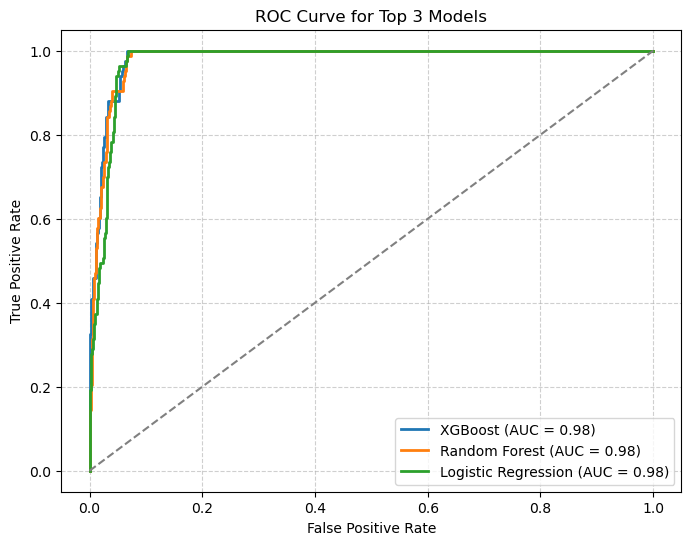

Top 3 Models:
XGBoost - F1 Score: 0.6160, ROC AUC: 0.9840
Random Forest - F1 Score: 0.6029, ROC AUC: 0.9820
Logistic Regression - F1 Score: 0.5825, ROC AUC: 0.9776


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
from imblearn.combine import SMOTEENN  

# Load dataset
df = pd.read_csv("cleaned_earthquake_data.csv")

df['time'] = pd.to_datetime(df['time'], format='mixed')
df['severity'] = np.where(df['mag'] > 4.5, 1, 0)

features = ['latitude', 'longitude', 'depth', 'gap', 'rms', 'dmin', 'horizontalError']
X = df[features]
y = df['severity']

np.random.seed(42)
X += np.random.normal(0, 0.01, X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(C=1, max_iter=2000, solver='liblinear', random_state=42),
    "SVM": SVC(C=1.5, kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10, weights='distance')
}

results = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    results[name] = {
        "F1 Score": f1,
        "ROC AUC Score": roc_auc,
        "Model": model
    }

# Select top 3 models based on F1 Score
top_3_models = sorted(results.items(), key=lambda x: x[1]['F1 Score'], reverse=True)[:3]

plt.figure(figsize=(8, 6))
for name, metrics in top_3_models:
    model = metrics['Model']
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, linestyle='-', linewidth=2, label=f'{name} (AUC = {metrics["ROC AUC Score"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Top 3 Models")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Top 3 Models:")
for name, metrics in top_3_models:
    print(f"{name} - F1 Score: {metrics['F1 Score']:.4f}, ROC AUC: {metrics['ROC AUC Score']:.4f}")


                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0              XGBoost  0.936993   0.450000  0.975904  0.615970       0.983965
1        Random Forest  0.932626   0.433862  0.987952  0.602941       0.982039
2  Logistic Regression  0.925764   0.410891  1.000000  0.582456       0.977608


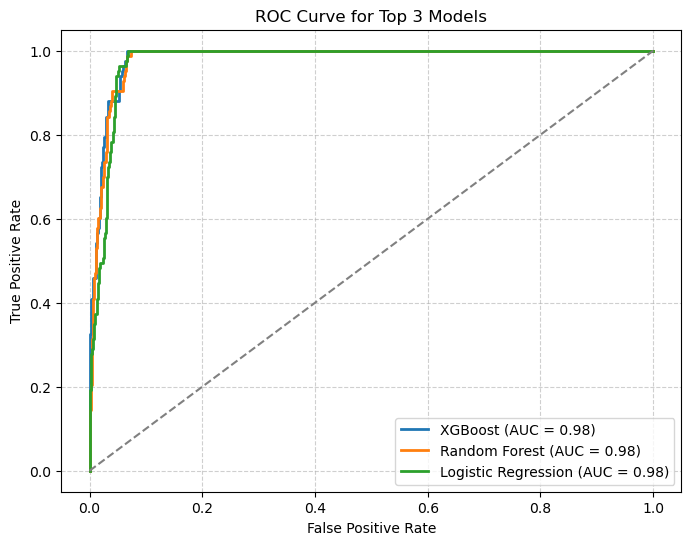

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
from imblearn.combine import SMOTEENN  

# Load dataset
df = pd.read_csv("cleaned_earthquake_data.csv")

df['time'] = pd.to_datetime(df['time'], format='mixed')
df['severity'] = np.where(df['mag'] > 4.5, 1, 0)

features = ['latitude', 'longitude', 'depth', 'gap', 'rms', 'dmin', 'horizontalError']
X = df[features]
y = df['severity']

np.random.seed(42)
X += np.random.normal(0, 0.01, X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(C=1, max_iter=2000, solver='liblinear', random_state=42),
    "SVM": SVC(C=1.5, kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10, weights='distance')
}

results = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC Score": roc_auc,
        "Model": model
    }

# Select top 3 models based on F1 Score
top_3_models = sorted(results.items(), key=lambda x: x[1]['F1 Score'], reverse=True)[:3]

# Convert results to DataFrame and display in table format
table_data = []
for name, metrics in top_3_models:
    table_data.append([name, metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1 Score'], metrics['ROC AUC Score']])

df_results = pd.DataFrame(table_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"])
print(df_results)

plt.figure(figsize=(8, 6))
for name, metrics in top_3_models:
    model = metrics['Model']
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, linestyle='-', linewidth=2, label=f'{name} (AUC = {metrics["ROC AUC Score"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Top 3 Models")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
